In [638]:
# Importing common libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [640]:
data=pd.read_csv("House_data.csv")

In [642]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [644]:
#check mising data
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [646]:
data.shape

(21613, 21)

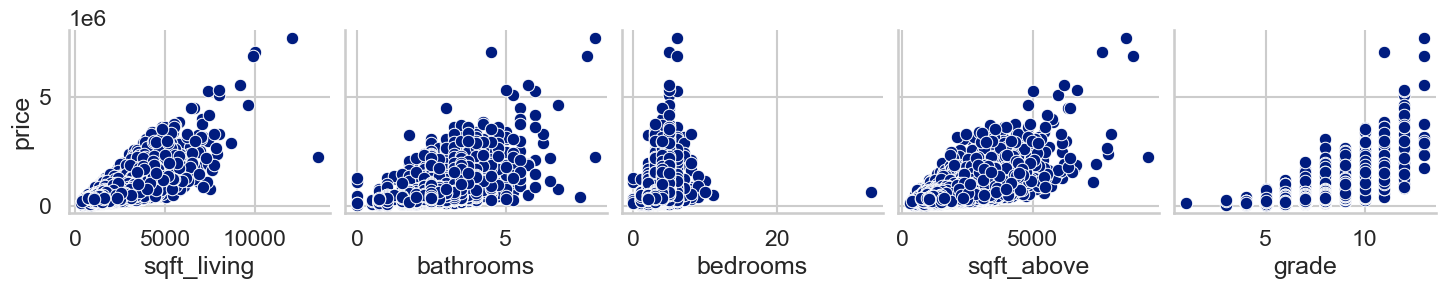

In [648]:
# Let's see how Sales are related with other variables using scatter plot.
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data, x_vars=['sqft_living','bathrooms', 'bedrooms','sqft_above' ,'grade'], 
             y_vars='price', height=3, aspect=1, kind='scatter')
plt.show()

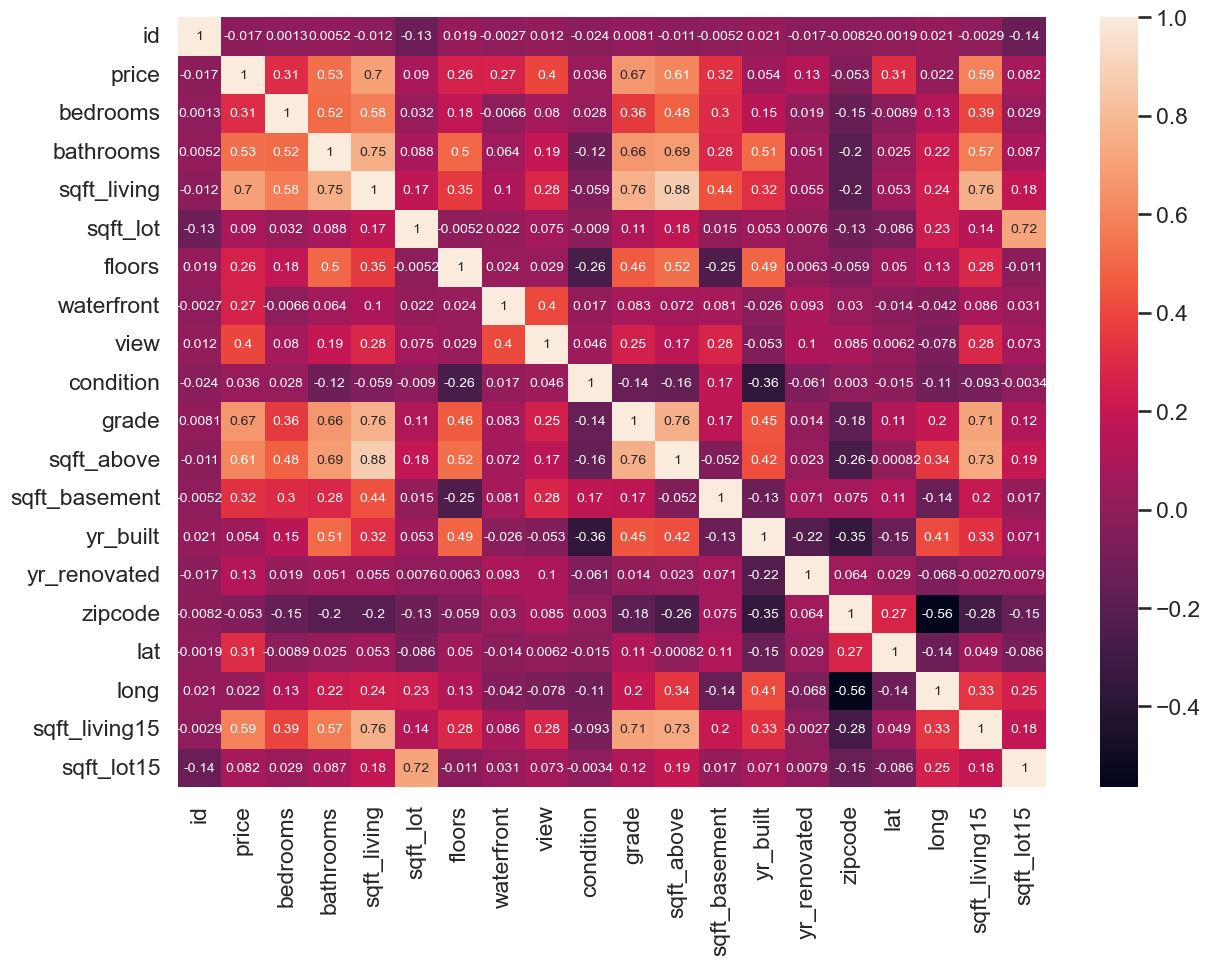

In [650]:
fig, ax = plt.subplots(figsize=(14,10)) #code untuk besar kan heatmap

# Visualizing the data using heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True, annot_kws={'size': 10})
plt.show()

In [652]:
features = ['sqft_living','bathrooms', 'bedrooms','sqft_above' ,'grade']
X = data[features].values.reshape(-1,5)
y=data.price.values.reshape(-1,1)


In [654]:
X

array([[1.18e+03, 1.00e+00, 3.00e+00, 1.18e+03, 7.00e+00],
       [2.57e+03, 2.25e+00, 3.00e+00, 2.17e+03, 7.00e+00],
       [7.70e+02, 1.00e+00, 2.00e+00, 7.70e+02, 6.00e+00],
       ...,
       [1.02e+03, 7.50e-01, 2.00e+00, 1.02e+03, 7.00e+00],
       [1.60e+03, 2.50e+00, 3.00e+00, 1.60e+03, 8.00e+00],
       [1.02e+03, 7.50e-01, 2.00e+00, 1.02e+03, 7.00e+00]])

In [656]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [680]:
from sklearn.model_selection import train_test_split
#split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
#This parameter controls the shuffling applied to the data before splitting.
#Using a fixed random state (like 42) ensures that you get the same split every time you run the code (useful for reproducibility).
#If you don’t set a random state, the split will be different each time you run the code.

In [682]:
X_train

array([[2.82e+03, 2.50e+00, 5.00e+00, 2.38e+03, 7.00e+00],
       [2.88e+03, 3.25e+00, 4.00e+00, 2.27e+03, 1.10e+01],
       [2.45e+03, 3.50e+00, 5.00e+00, 2.45e+03, 9.00e+00],
       ...,
       [2.12e+03, 2.50e+00, 3.00e+00, 2.12e+03, 7.00e+00],
       [3.80e+02, 7.50e-01, 1.00e+00, 3.80e+02, 5.00e+00],
       [3.13e+03, 2.50e+00, 4.00e+00, 3.13e+03, 7.00e+00]])

In [684]:
X_test

array([[2.07e+03, 2.25e+00, 4.00e+00, 2.07e+03, 8.00e+00],
       [2.90e+03, 3.00e+00, 5.00e+00, 1.83e+03, 8.00e+00],
       [3.77e+03, 2.50e+00, 4.00e+00, 3.77e+03, 1.10e+01],
       ...,
       [1.73e+03, 1.00e+00, 4.00e+00, 1.73e+03, 6.00e+00],
       [1.79e+03, 1.00e+00, 2.00e+00, 1.36e+03, 8.00e+00],
       [1.17e+03, 2.00e+00, 3.00e+00, 1.17e+03, 6.00e+00]])

In [686]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [688]:
#FUNCTION FOR EVALUATION
import sklearn.metrics as metrics
#evaluation metric
def evaluate(y_actual,y_predict):
    print('R Squared : ',metrics.r2_score(y_actual,y_predict))
    print('Mean Absolute Error : ',metrics.mean_absolute_error(y_actual,y_predict))
    print('Mean Squared Error : ',metrics.mean_squared_error(y_actual,y_predict))
    print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(y_actual,y_predict)))

In [690]:
print("Result on Train Data with 5 feature:")
evaluate(y_train,y_train_pred)

Result on Train Data with 5 feature:
R Squared :  0.5593607702486687
Mean Absolute Error :  155371.80318045666
Mean Squared Error :  53200392005.95425
Root Mean Squared Error :  230652.1016725281


In [692]:
print("Result on Test Data with 5 feature:")
evaluate(y_test,y_test_pred)

Result on Test Data with 5 feature:
R Squared :  0.5405759759436155
Mean Absolute Error :  161037.53790733905
Mean Squared Error :  68519512228.227165
Root Mean Squared Error :  261762.32010781683


In [694]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_test_pred.flatten()})

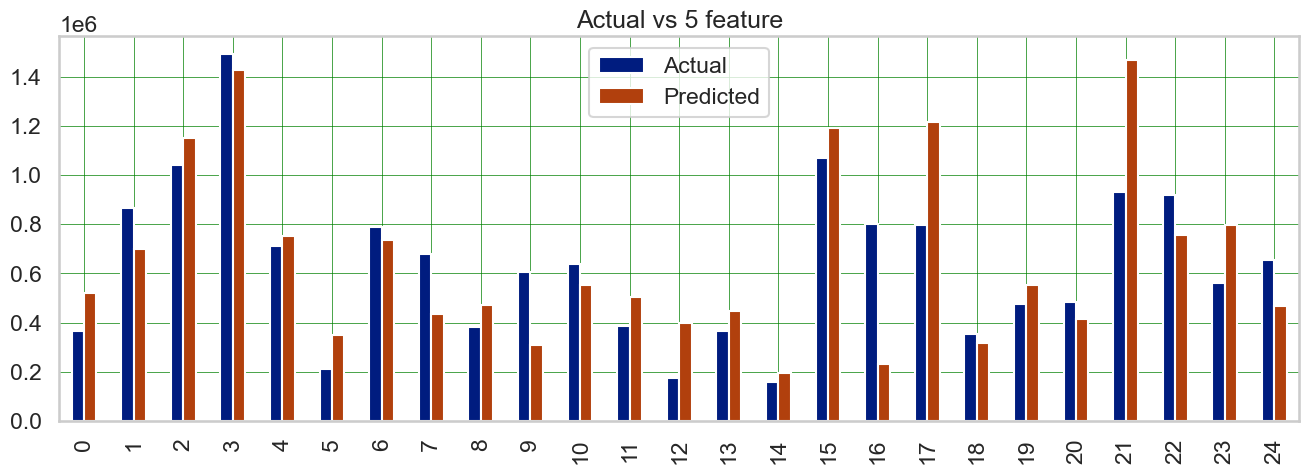

In [696]:
df1 = data.head(25)
df1.plot(kind='bar',figsize=(16,5), title='Actual vs 5 feature')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

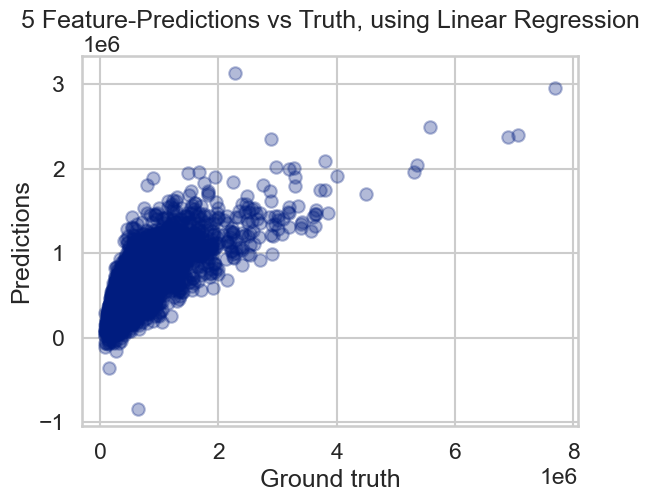

In [698]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#sns.set_context('talk')
#sns.set_style('ticks')
#sns.set_palette('dark')
# Set Seaborn context, style, and color palette for better contrast
sns.set_context('talk')   # Larger font sizes (suitable for presentations)
sns.set_style('whitegrid')  # Add light gridlines for better readability
sns.set_palette('dark')  # Use colorblind-friendly palette

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.3)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='5 Feature-Predictions vs Truth, using Linear Regression');

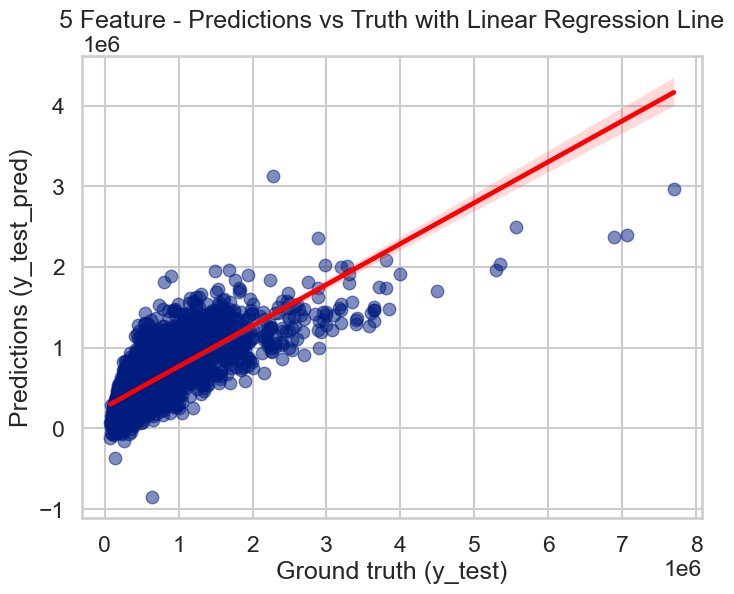

In [700]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style and context
sns.set_context('talk')
sns.set_style('whitegrid')

# Create a scatter plot with the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Ground truth (y_test)')
plt.ylabel('Predictions (y_test_pred)')
plt.title('5 Feature - Predictions vs Truth with Linear Regression Line')

# Show the plot
plt.show()
